In [1]:
# Import all necessary modules.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [2]:
# reset PN sequence generator.
seed = 42
np.random.seed(seed)

### Gerando o conjunto de dados.

In [3]:
# Number of examples.
N = 1000

# Create the dataset.
X, y = make_circles(n_samples=N, factor=.5, noise=.05)

# Number of classes.
numberOfClasses = 2

### Plotando as classes.

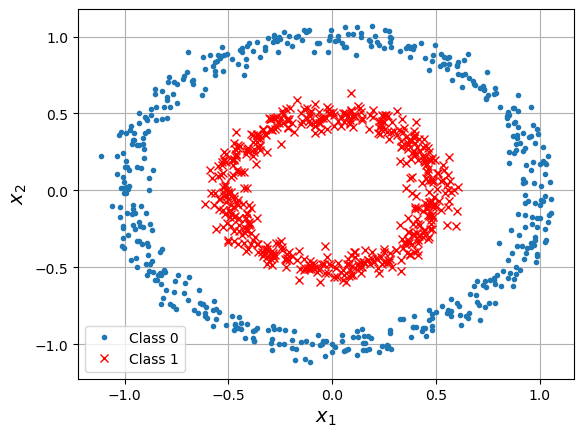

In [4]:
# Plot the dataset.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Dividindo o conjunto em conjuntos de treinamento e validação.

In [5]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

### Validação cruzada para encontrar a ordem ótima.

**OBS**: No código abaixo, a classe `LogisticRegression` é instanciada com o parâmetro `fit_intercept` com seu valor padrão, ou seja, `True`. Portanto, não é necessário concatenar o vetor do atributo de bias (i.e., vetor com valores iguais a 1) às matrizes de atributos de treinamento e validação (teste), pois isto é feito automaticamente pela classe `LogisticRegression`.

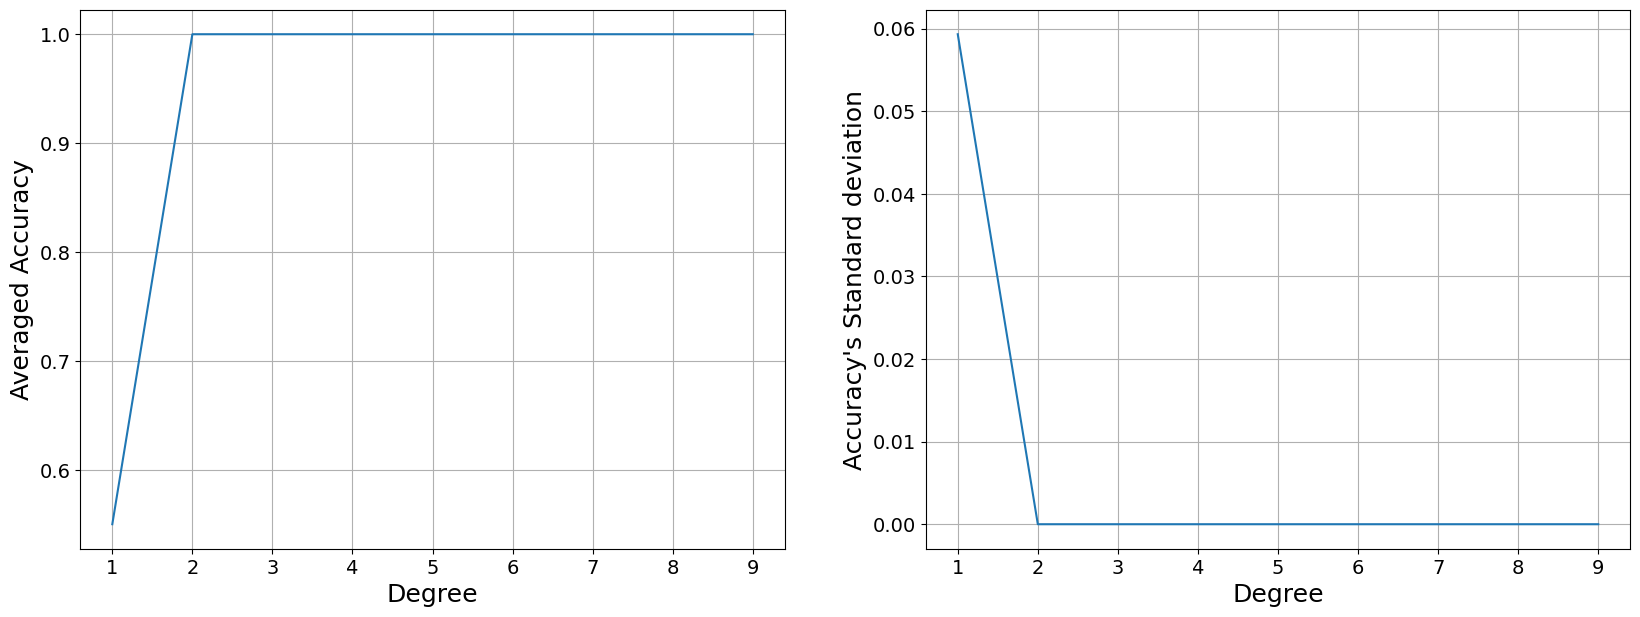

In [6]:
# Maximum degree to be tested.
maxDegree = 10

# Sequence of polynomial orders to be tested.
poly_orders = range(1, maxDegree)

# Number of folds.
k = 10
# Instantiate the k-Fold object.
kfold = KFold(n_splits=k, shuffle=True, random_state=seed)

# Iterate over the possible polynomial orders.
kfold_mean_vec = []
kfold_std_vec = []
for order in poly_orders:

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=order)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a binary classifier.
    clf = LogisticRegression(random_state=seed)

    # Create a pipeline of actions.
    model = Pipeline([
        ('poly', poly), 
        ('scaler', scaler),
        ('clf', clf)
    ])
    
    # Cross-validation with k-Fold.
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)

    # Storing the scores.
    kfold_mean_vec.append(scores.mean())
    kfold_std_vec.append(scores.std())

# Plot the results.
plt.figure(figsize=(20, 7))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1,maxDegree), kfold_mean_vec)
plt.ylabel('Averaged Accuracy', fontsize=18)
plt.xlabel('Degree', fontsize=18)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 2, 2)
plt.plot(range(1,maxDegree), kfold_std_vec)
plt.ylabel('Accuracy\'s Standard deviation', fontsize=18)
plt.xlabel('Degree', fontsize=18)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

### Acurácia com ordem ótima.

Como todos os polinômios com ordem maior ou igual a dois resultam em uma acurácia de 100%, então, seguindo o princípio da navalha de Occam, escolhemos um polinômio de ordem dois, pois ele é o polinômio com menor complexidade e que classifica o conjunto de dados perfeitamente.

In [7]:
# Instantiate a polynomial.
poly = PolynomialFeatures(degree=2)
# Instantiate a scaler.
scaler = StandardScaler()
# Instantiate a binary classifier.
clf = LogisticRegression(random_state=seed)

# Create a pipeline of actions.
model = Pipeline([
    ('poly', poly), 
    ('scaler', scaler),
    ('clf', clf)
])

# Train the model.
model.fit(X_train, y_train)

# Prediction.
y_pred = model.predict(X_test)

# Measure the model's accuracy.
acc = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression model is: %1.2f %%' % (acc*100))

Accuracy of Logistic Regression model is: 100.00 %


### Plotando as regiões de decisão.

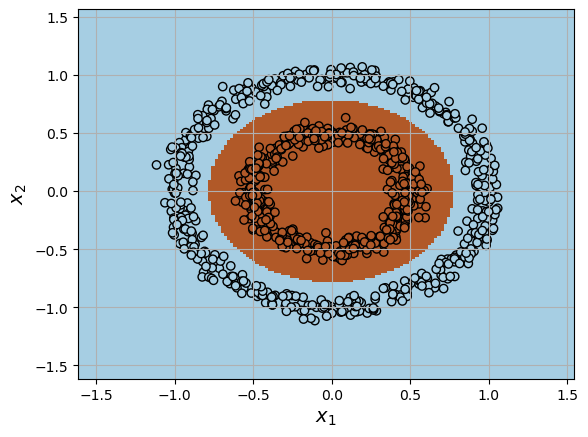

In [8]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid()

plt.show()

### Plotando a matriz de confusão.

**OBS**.: Aqui usamos todo o conjunto de exemplos.

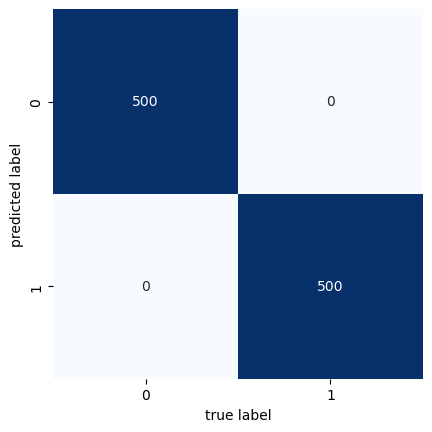

In [9]:
# Making prediction with the whole dataset.
y_pred = model.predict(X)

# Plot the confusion matrix.
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=range(numberOfClasses), yticklabels=range(numberOfClasses), cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

**Conclusão**

Como pode ser visto, a matriz de confusão para os exemplos do conjunto de teste só tem os elementos da diagonal principal diferentes de zero, indicando que o modelo generaliza bem, pois não classifica nenhum exemplo incorretamente (valores fora da diaginal principal iguais a 0).

### Gerando o reporte de classificação.

**OBS**.: Aqui também usamos todo o conjunto de exemplos.

In [10]:
print(classification_report(y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       500
           1     1.0000    1.0000    1.0000       500

    accuracy                         1.0000      1000
   macro avg     1.0000    1.0000    1.0000      1000
weighted avg     1.0000    1.0000    1.0000      1000



**Conclusões**

+ Todas as métricas atingiram seus valores máximos.
+ As métricas mostram que este é um classificador perfeito para o conjunto total de exemplos.
+ Ele foi capaz de obter uma solução geral (i.e., função hipótese) que separa perfeitamente as classes.
+ Conforme pode ser visto pela matriz de confusão com valores diferentes de zero apenas em sua diagonal princial, o modelo obteve 100% de acurácia no conjunto total de exemplos (treinamento e validação), mostrando que ele possui um bom grau de generalização.